In [20]:
import niwidgets

In [21]:
import nilearn


## Example from nilearn

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished


[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  1 out of 4


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished


[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  2 out of 4


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished


[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  3 out of 4


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished
/opt/conda/envs/neuro/lib/python3.6/site-packages/nilearn/connectome/group_sparse_cov.py:245: UserWarning: input signals do not all have unit variance. This can lead to numerical instability.
  warnings.warn("input signals do not all have unit variance. This "


[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  4 out of 4
[GroupSparseCovarianceCV.fit] Final optimization


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


[GraphLassoCV] Done refinement  1 out of 4:   0s
[GraphLassoCV] Done refinement  2 out of 4:   0s
[GraphLassoCV] Done refinement  3 out of 4:   0s
[GraphLassoCV] Done refinement  4 out of 4:   0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


[GraphLassoCV] Done refinement  1 out of 4:   0s
[GraphLassoCV] Done refinement  2 out of 4:   0s
[GraphLassoCV] Done refinement  3 out of 4:   0s
[GraphLassoCV] Done refinement  4 out of 4:   0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


[GraphLassoCV] Done refinement  1 out of 4:   0s
[GraphLassoCV] Done refinement  2 out of 4:   0s
[GraphLassoCV] Done refinement  3 out of 4:   0s
[GraphLassoCV] Done refinement  4 out of 4:   0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


[GraphLassoCV] Done refinement  1 out of 4:   0s
[GraphLassoCV] Done refinement  2 out of 4:   0s
[GraphLassoCV] Done refinement  3 out of 4:   0s
[GraphLassoCV] Done refinement  4 out of 4:   0s


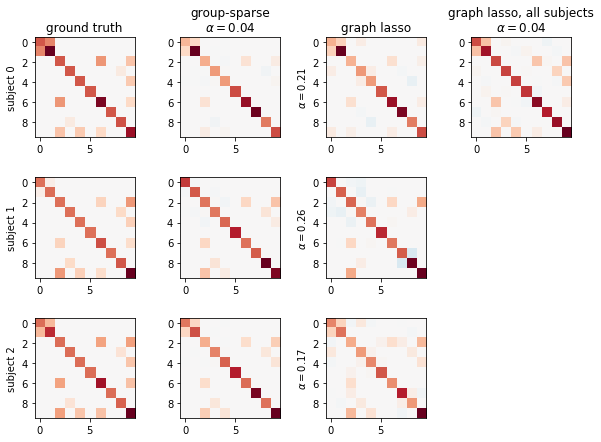

In [22]:
import matplotlib.pyplot as plt


def plot_matrix(m, ylabel=""):
    abs_max = abs(m).max()
    plt.imshow(m, cmap=plt.cm.RdBu_r, interpolation="nearest",
               vmin=-abs_max, vmax=abs_max)


# Generate synthetic data
from nilearn._utils.testing import generate_group_sparse_gaussian_graphs

n_subjects = 20  # number of subjects
n_displayed = 3  # number of subjects displayed
subjects, precisions, topology = generate_group_sparse_gaussian_graphs(
    n_subjects=n_subjects, n_features=10, min_n_samples=30, max_n_samples=50,
    density=0.1)

fig = plt.figure(figsize=(10, 7))
plt.subplots_adjust(hspace=0.4)
for n in range(n_displayed):
    plt.subplot(n_displayed, 4, 4 * n + 1)
    plot_matrix(precisions[n])
    if n == 0:
        plt.title("ground truth")
    plt.ylabel("subject %d" % n)


# Run group-sparse covariance on all subjects
from nilearn.connectome import GroupSparseCovarianceCV
gsc = GroupSparseCovarianceCV(max_iter=50, verbose=1)
gsc.fit(subjects)

for n in range(n_displayed):
    plt.subplot(n_displayed, 4, 4 * n + 2)
    plot_matrix(gsc.precisions_[..., n])
    if n == 0:
        plt.title("group-sparse\n$\\alpha=%.2f$" % gsc.alpha_)


# Fit one graph lasso per subject
from sklearn.covariance import GraphLassoCV
gl = GraphLassoCV(verbose=1)

for n, subject in enumerate(subjects[:n_displayed]):
    gl.fit(subject)

    plt.subplot(n_displayed, 4, 4 * n + 3)
    plot_matrix(gl.precision_)
    if n == 0:
        plt.title("graph lasso")
    plt.ylabel("$\\alpha=%.2f$" % gl.alpha_)


# Fit one graph lasso for all subjects at once
import numpy as np
gl.fit(np.concatenate(subjects))

plt.subplot(n_displayed, 4, 4)
plot_matrix(gl.precision_)
plt.title("graph lasso, all subjects\n$\\alpha=%.2f$" % gl.alpha_)

plt.show()

In [23]:
from nilearn._utils.testing import generate_fake_fmri
im1,mask1 = generate_fake_fmri()
im1.shape, mask1.shape
nx, ny, nz, nt = im1.shape
nx, ny, nz, nt

(10, 11, 12, 17)

## Question: can I map this back to a brain image?

This is called _coregistration_, and we can find an example of it here: [example_preprocessing.ipynb](http://localhost:8888/notebooks/notebooks/example_preprocessing.ipynb#)

The FSL documentation can be found here: [FMRIB Software Library](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/FSL)
- [BET](): Brain Extraction Transform ?? gets a brain/skull mask and other stuff
- ExtractROI: gets Region Of Interest from Brain
- [FAST](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/FAST) (FMRIB's Automated Segmentation Tool) segments a 3D image of the brain
- [FLIRT](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/FLIRT) (FMRIB's Linear Image Registration Tool) is a fully automated robust and accurate tool for linear (affine) intra- and inter-modal brain image registration.
- 

In [24]:
%matplotlib inline
from os.path import join as opj
import os
import json
from nipype.interfaces.fsl import (BET, ExtractROI, FAST, FLIRT, ImageMaths,
                                   MCFLIRT, SliceTimer, Threshold)
#BET: Brain Extraction Transform ?? gets a brain/skull mask and other stuff
# ExtractROI: gets Region Of Interest from Brain
# FAST (FMRIB's Automated Segmentation Tool) segments a 3D image of the brain
# FLIRT (FMRIB's Linear Image Registration Tool) is a fully automated robust and accurate tool for linear (affine) intra- and inter-modal brain image registration.
from nipype.interfaces.spm import Smooth
from nipype.interfaces.utility import IdentityInterface
from nipype.interfaces.io import SelectFiles, DataSink
from nipype.algorithms.rapidart import ArtifactDetect
from nipype.pipeline.engine import Workflow, Node

# Experiment parameters
It's always a good idea to specify all parameters that migt change between experiments at the beginning of your scirpt. We will use one functional image for fingerfootlips task for ten subjects.

In [25]:
experiment_dir = '/output'
output_dir = 'datasink'
working_dir = 'workingdir'

# list of subject identifiers
subject_list = ['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05',
                'sub-06', 'sub-07', 'sub-08', 'sub-09', 'sub-10']

# list of session identifiersT
task_list = ['fingerfootlips']

# Smoothing widths to apply
fwhm = [4, 8]

# TR of functional images
with open('/data/ds000114/task-fingerfootlips_bold.json', 'rt') as fp:
    task_info = json.load(fp)
TR = task_info['RepetitionTime']

# Isometric resample of functional images to voxel size (in mm)
iso_size = 4

In [26]:
# BET - Skullstrip anatomical Image
bet_anat = Node(BET(frac=0.5,
                    robust=True,
                    output_type='NIFTI_GZ'),
                name="bet_anat")

# FAST - Image Segmentation - into grey, white, CSF 
segmentation = Node(FAST(output_type='NIFTI_GZ'),
                name="segmentation")

# Select WM segmentation file from segmentation output - WM would be white matter
def get_wm(files):
    return files[-1]

# Threshold - Threshold WM probability image
threshold = Node(Threshold(thresh=0.5,
                           args='-bin',
                           output_type='NIFTI_GZ'),
                name="threshold")

# FLIRT - pre-alignment of functional images to anatomical images
coreg_pre = Node(FLIRT(dof=6, output_type='NIFTI_GZ'),
                 name="coreg_pre")

# FLIRT - coregistration of functional images to anatomical images with BBR
coreg_bbr = Node(FLIRT(dof=6,
                       cost='bbr',
                       schedule=opj(os.getenv('FSLDIR'),
                                    'etc/flirtsch/bbr.sch'),
                       output_type='NIFTI_GZ'),
                 name="coreg_bbr")

# Apply coregistration warp to functional images
applywarp = Node(FLIRT(interp='spline',
                       apply_isoxfm=iso_size,
                       output_type='NIFTI'),
                 name="applywarp")

# Apply coregistration warp to mean file
applywarp_mean = Node(FLIRT(interp='spline',
                            apply_isoxfm=iso_size,
                            output_type='NIFTI_GZ'),
                 name="applywarp_mean")

# Create a coregistration workflow
coregwf = Workflow(name='coregwf')
coregwf.base_dir = opj(experiment_dir, working_dir)

# Connect all components of the coregistration workflow
coregwf.connect([(bet_anat, segmentation, [('out_file', 'in_files')]),
                 (segmentation, threshold, [(('partial_volume_files', get_wm),
                                             'in_file')]),
                 (bet_anat, coreg_pre, [('out_file', 'reference')]),
                 (threshold, coreg_bbr, [('out_file', 'wm_seg')]),
                 (coreg_pre, coreg_bbr, [('out_matrix_file', 'in_matrix_file')]),
                 (coreg_bbr, applywarp, [('out_matrix_file', 'in_matrix_file')]),
                 (bet_anat, applywarp, [('out_file', 'reference')]),
                 (coreg_bbr, applywarp_mean, [('out_matrix_file', 'in_matrix_file')]),
                 (bet_anat, applywarp_mean, [('out_file', 'reference')]),
                 ])

## plotting of sample data generate by nilearn

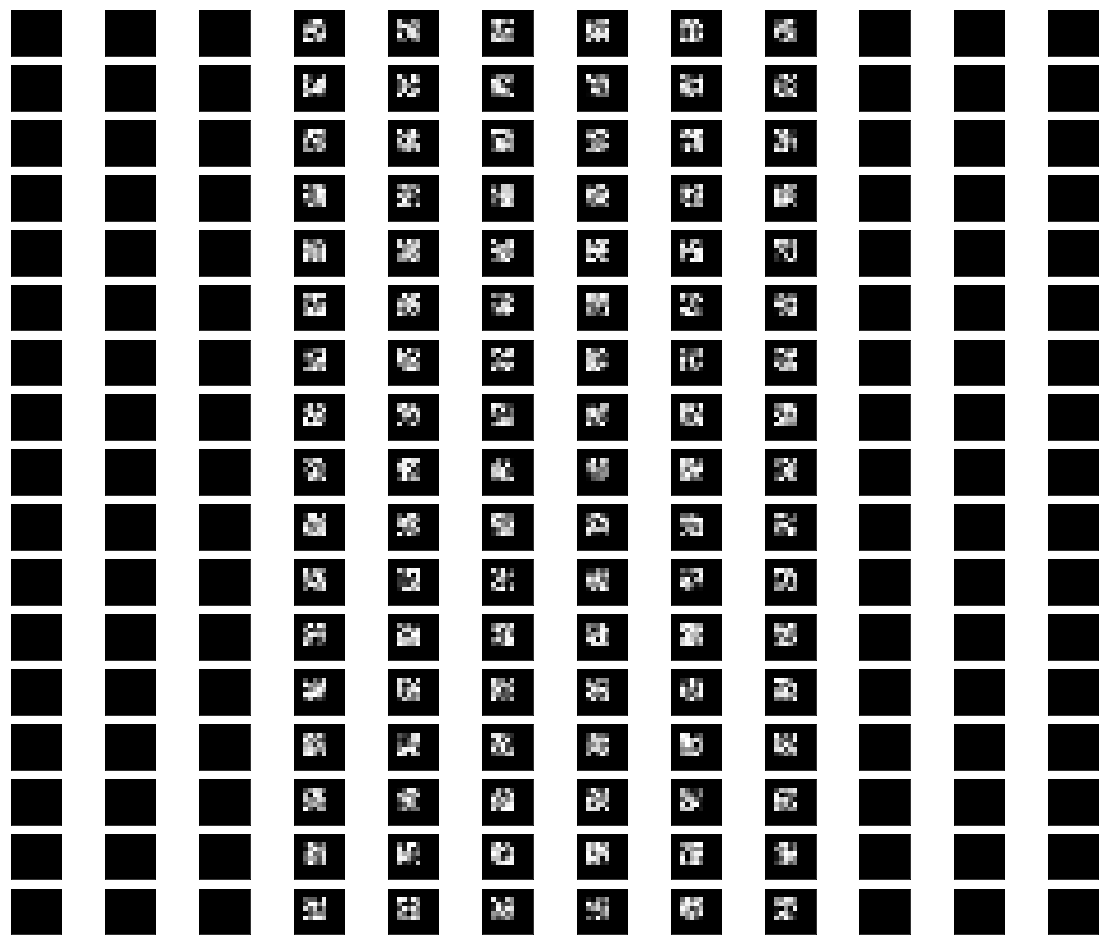

In [27]:
# Q: why does mask vary with time?? 
# R: it doesn't, its a 3D mask. not 4.
fig = plt.figure(figsize=(20, 17))

for ts in range(nt):
    for zs in range(nz):
        plt.subplot(nt, nz, ts*nz + zs + 1)
        fig_s = plt.imshow(im1.get_data()[:,:,zs,ts], cmap='Greys_r')
        fig_s.axes.set_xticks([])
        fig_s.axes.set_yticks([])
#     plt.imshow(im1.get_data()[...,i], cmap='Greys_r')
#     show()

In [28]:
im1.dataobj.mean(axis=(0,1,3)).shape

(12,)

In [29]:
im1.dataobj[:,:, 5, 0]

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,  164.,  255.,  152.,  100.,  199.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,   92.,  195.,   16.,    0.,   13.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,   54.,  162.,   59.,  235.,  133.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,  189.,   89.,  136.,  107.,   75.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,  187.,  232.,  167.,  137.,  131.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.]])

In [30]:
def normalize_j(a):
    m = a.flatten().mean()
    return (a - m)/ m

In [31]:
def demean_over_time(a):
    m = a.mean(axis=(0,1,2))
    return (a - m)

In [32]:
np.c_[a[2:5,2:5,3:5,0], demean_over_time(a[2:5,2:5,3:5,0])]

NameError: name 'a' is not defined

In [ ]:
np.r_[a[2:5,2:5,3:5,0], demean_over_time(a[2:5,2:5,3:5,0])]

In [ ]:
a_d = demean_over_time(a[2:5,2:5,3:5,0])
a_d.sum(axis=1)

In [15]:
# average of total volume over time
volume_mean = im1.dataobj.flatten().mean()
plot((im1.dataobj.mean(axis=(0,1,2)) - volume_mean )/ volume_mean)

NameError: name 'plot' is not defined

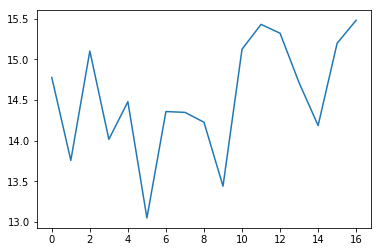

In [105]:
# average of total volume over time
plot(im1.dataobj.mean(axis=(0,1,3)))

In [ ]:
plot(im1.dataobj[:])

In [17]:
import nibabel as nib

In [16]:
import pylab as plt

In [18]:
# get 5th volume
t1 = i1.get_data()[:,:,:,5]

NameError: name 'i1' is not defined

In [52]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/conda/envs/neuro/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [19]:
data = i1.get_data()
fig = plt.imshow(data[:,:,data.shape[2] // 2, 10].T, cmap='Greys_r')
fig.axes.set_xticks([])
_ = fig.axes.set_yticks([])

NameError: name 'i1' is not defined

In [67]:
data[:,:,data.shape[2] // 2, 10].T

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,  169.,  242.,  250.,   43.,  161.,    0.,    0.,
           0.],
       [   0.,    0.,  240.,  114.,   48.,   26.,  159.,    0.,    0.,
           0.],
       [   0.,    0.,  171.,   61.,   58.,  146.,  157.,    0.,    0.,
           0.],
       [   0.,    0.,   88.,  140.,  159.,  162.,   96.,    0.,    0.,
           0.],
       [   0.,    0.,  225.,   36.,  155.,  107.,   69.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.]])